In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [384]:
df = pd.read_csv('housePrice.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [385]:
#Delete unnecessary data
df.drop('Price(USD)', axis=1, inplace=True)

#Removing outlier data
indexNames = df[df['Area'].apply(lambda x: not x.isdigit())].index
df.drop(indexNames , inplace=True)
df = df[df['Address'].notna()]
df = df.reset_index(drop=True)

#Changing 'Area' column type
df['Area'] = df['Area'].astype(np.int32)

df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1.850000e+09
1,60,1,True,True,True,Shahran,1.850000e+09
2,79,2,True,True,True,Pardis,5.500000e+08
3,95,2,True,True,True,Shahrake Qods,9.025000e+08
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09
...,...,...,...,...,...,...,...
3445,86,2,True,True,True,Southern Janatabad,3.500000e+09
3446,83,2,True,True,True,Niavaran,6.800000e+09
3447,75,2,False,False,False,Parand,3.650000e+08
3448,105,2,True,True,True,Dorous,5.600000e+09


In [386]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3450 entries, 0 to 3449
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3450 non-null   int32  
 1   Room       3450 non-null   int64  
 2   Parking    3450 non-null   bool   
 3   Warehouse  3450 non-null   bool   
 4   Elevator   3450 non-null   bool   
 5   Address    3450 non-null   object 
 6   Price      3450 non-null   float64
dtypes: bool(3), float64(1), int32(1), int64(1), object(1)
memory usage: 104.6+ KB


Area         0
Room         0
Parking      0
Warehouse    0
Elevator     0
Address      0
Price        0
dtype: int64

In [390]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
#from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
#le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
#label = le.fit_transform(df['Address'])

def avg(address, df):
    districtPrices = df[df['Address'] == address]['Price'].values
    return districtPrices.sum()/districtPrices.size

label = df['Address'].apply(avg, df=df).values


# printing label
df1 = pd.DataFrame(label, columns=['DistrictAvg'])
df = pd.concat([df,df1],axis=1)
df.isna().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address        0
Price          0
DistrictAvg    0
dtype: int64

In [391]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,DistrictAvg
0,63,1,True,True,True,Shahran,1.850000e+09,2.985754e+09
1,60,1,True,True,True,Shahran,1.850000e+09,2.985754e+09
2,79,2,True,True,True,Pardis,5.500000e+08,7.778219e+08
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,9.009217e+08
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,1.196988e+10
...,...,...,...,...,...,...,...,...
3445,86,2,True,True,True,Southern Janatabad,3.500000e+09,3.178452e+09
3446,83,2,True,True,True,Niavaran,6.800000e+09,1.989321e+10
3447,75,2,False,False,False,Parand,3.650000e+08,5.235906e+08
3448,105,2,True,True,True,Dorous,5.600000e+09,1.873462e+10


/tmp/ipykernel_1948707/1941098767.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
/tmp/ipykernel_1948707/1941098767.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Greens')


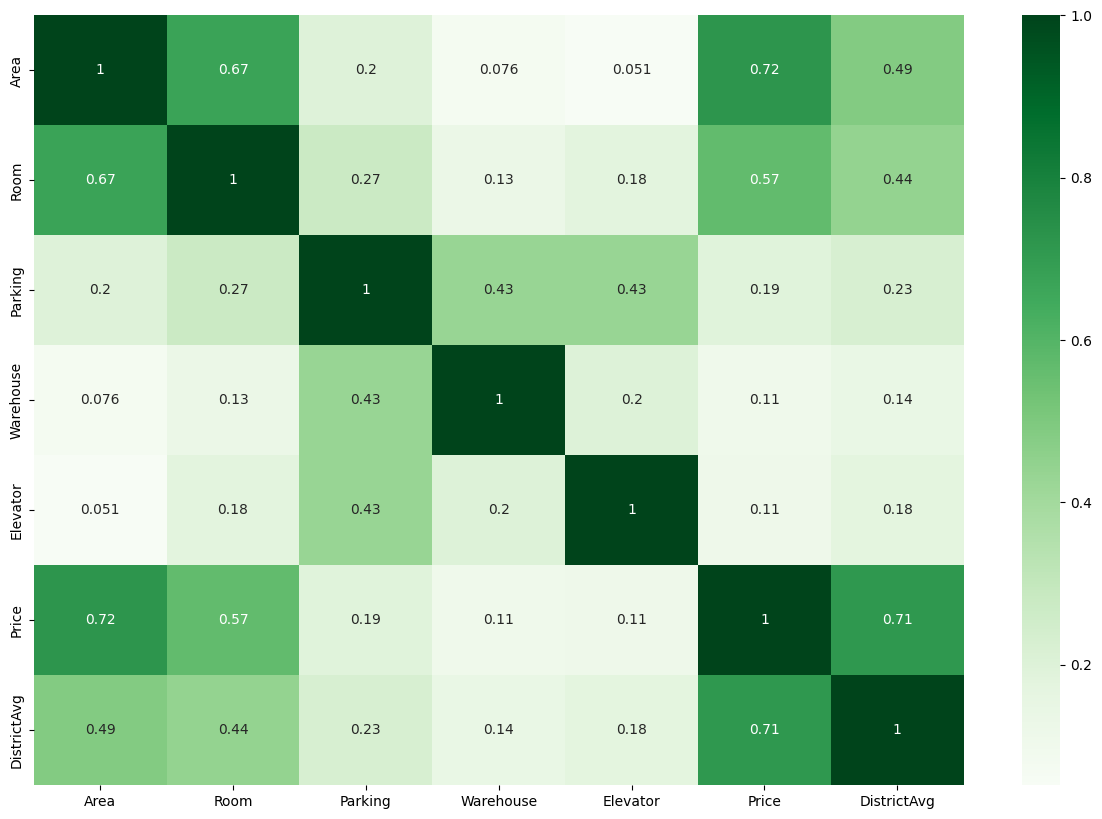

In [392]:
df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3450 entries, 0 to 3449
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         3450 non-null   int32  
 1   Room         3450 non-null   int64  
 2   Parking      3450 non-null   bool   
 3   Warehouse    3450 non-null   bool   
 4   Elevator     3450 non-null   bool   
 5   Address      3450 non-null   object 
 6   Price        3450 non-null   float64
 7   DistrictAvg  3450 non-null   float64
dtypes: bool(3), float64(2), int32(1), int64(1), object(1)
memory usage: 131.5+ KB


In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
#import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

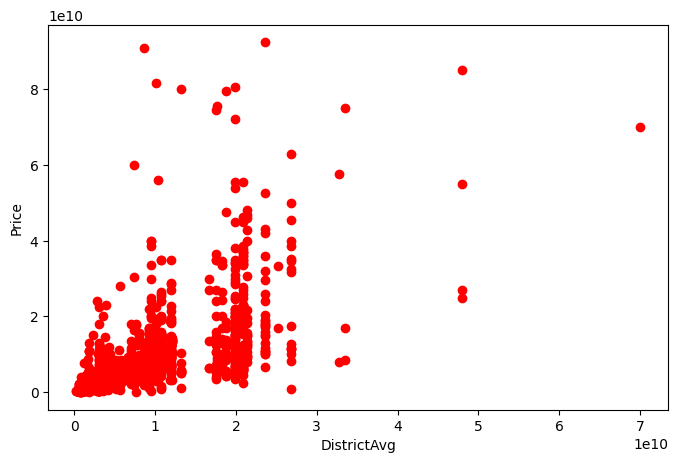

In [393]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["DistrictAvg"].values, df["Price"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Price')
plt.xlabel('DistrictAvg')
plt.show()

In [332]:
def exponential(x, a, b, c):
     y = a + np.power(b * c/2, x)
     return y

In [323]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [333]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(exponential, xdata, ydata)
#print the final parameters
print(" a = %f, b = %f, , c = %f" % (popt[0], popt[1], popt[2]))

 a = -0.946908, b = -1.388662, , c = -1.540925


/tmp/ipykernel_1948707/4286779477.py:2: RuntimeWarning: invalid value encountered in power
  y = a + np.power(b * c/2, x)


In [330]:
min(x_data)

250000000.0

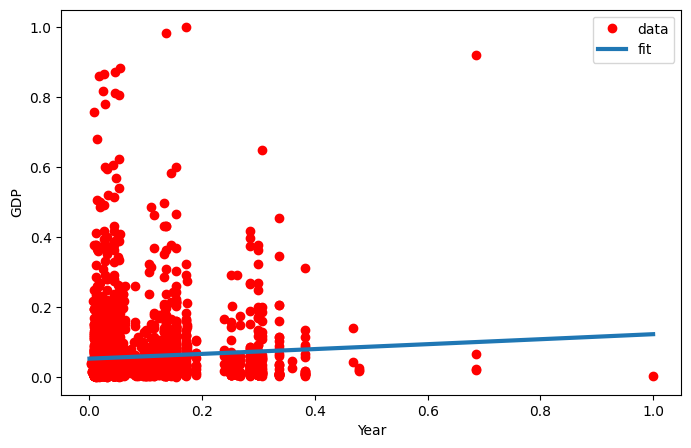

In [336]:
x = np.linspace(250000000.0/10, 70000000000.0*10, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = exponential(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [419]:
#from sklearn.linear_model import LinearRegression

x = df.iloc[:, [0, 1, 2, 3, 4, 7]].values                                  
y = df["Price"].values.reshape(-1,1)

In [420]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
std_scaler = StandardScaler().fit(x)
x = std_scaler.transform(x)

In [421]:
poly_transformer = PolynomialFeatures(degree=2)
poly_transformer.fit(x)
poly_features = poly_transformer.transform(x)

In [425]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.20, random_state= 42)
model = LogisticRegression()
model.fit(x_train, y_train)

/run/media/cataphract/data/projects/ML_training/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/run/media/cataphract/data/projects/ML_training/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [407]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)

lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [417]:
from flaml import AutoML
automl = AutoML(task='regression', time_budget=60)
automl.fit(x_train, y_train)


[flaml.automl.automl: 03-08 22:36:15] {2726} INFO - task = regression
[flaml.automl.automl: 03-08 22:36:15] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-08 22:36:15] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-08 22:36:15] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-08 22:36:15] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-08 22:36:15] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-08 22:36:25] {3472} INFO - Estimated sufficient time budget=98201s. Estimated necessary time budget=692s.
[flaml.automl.automl: 03-08 22:36:25] {3519} INFO -  at 10.0s,	estimator lgbm's best error=0.6812,	best estimator lgbm's best error=0.6812
[flaml.automl.automl: 03-08 22:36:25] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-08 22:36:35] {3519} INFO -  at 19.6s,	estimator lgbm's best error=0.6812,	best esti

In [418]:
y_pred = automl.predict(x_test)
r2_score(y_test, y_pred)

0.6886941972967959

In [426]:
model.score(x_test, y_test)


0.043478260869565216

In [416]:
poly_transformer = PolynomialFeatures(degree=2)
poly_transformer.fit(x_test)
poly_features = poly_transformer.transform(x_test)
print(r2_score(y_test, model.predict(poly_features)))

-0.36770496042013323


In [415]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, model.predict(x_test)))

ValueError: X has 5 features, but LogisticRegression is expecting 21 features as input.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3479 entries, 0 to 2802
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3473 non-null   float64
 1   Room       3473 non-null   float64
 2   Parking    3473 non-null   object 
 3   Warehouse  3473 non-null   object 
 4   Elevator   3473 non-null   object 
 5   Address    3450 non-null   object 
 6   Price      3473 non-null   float64
 7   addLabel   3473 non-null   float64
dtypes: float64(4), object(4)
memory usage: 244.6+ KB


In [88]:
nans = df['Address'].isna()
df1 = df[~nans]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3450 non-null   float64
 1   Room       3450 non-null   float64
 2   Parking    3450 non-null   object 
 3   Warehouse  3450 non-null   object 
 4   Elevator   3450 non-null   object 
 5   Address    3450 non-null   object 
 6   Price      3450 non-null   float64
 7   addLabel   3444 non-null   float64
dtypes: float64(4), object(4)
memory usage: 242.6+ KB


In [90]:
nans = df1['addLabel'].isna()
df2 = df1[~nans]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3444 entries, 0 to 3472
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3444 non-null   float64
 1   Room       3444 non-null   float64
 2   Parking    3444 non-null   object 
 3   Warehouse  3444 non-null   object 
 4   Elevator   3444 non-null   object 
 5   Address    3444 non-null   object 
 6   Price      3444 non-null   float64
 7   addLabel   3444 non-null   float64
dtypes: float64(4), object(4)
memory usage: 242.2+ KB


In [92]:
df2['Parking'] = df2['Parking'].astype(bool)
df2['Warehouse'] = df2['Warehouse'].astype(bool)
df2['Elevator'] = df2['Elevator'].astype(bool)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3444 entries, 0 to 3472
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3444 non-null   float64
 1   Room       3444 non-null   float64
 2   Parking    3444 non-null   bool   
 3   Warehouse  3444 non-null   bool   
 4   Elevator   3444 non-null   bool   
 5   Address    3444 non-null   object 
 6   Price      3444 non-null   float64
 7   addLabel   3444 non-null   float64
dtypes: bool(3), float64(4), object(1)
memory usage: 171.5+ KB


/tmp/ipykernel_1892861/3725862547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Parking'] = df2['Parking'].astype(bool)
/tmp/ipykernel_1892861/3725862547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Warehouse'] = df2['Warehouse'].astype(bool)
/tmp/ipykernel_1892861/3725862547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda